In [117]:
import sys

sys.path.append("../src")

# from exp_smoothing import ExpSmoothing
import exponential_smoothing
from importlib import reload
reload(exponential_smoothing)

obj = exponential_smoothing.ExpSmoothing()

In [122]:
repo = "p971074907"
path = "brl:rn"
feature = "date:newDeaths"
mavg_window_size = "7"
begin = "2020-01-01"
end = "2050-01-01"

data = obj.get_data(repo, path, feature, mavg_window_size, begin, end)

In [123]:
data_test_size_in_days = 7*10
input_window_size = 7
scores = obj.grid_search_exp(data_test_size_in_days,input_window_size)

> Model[[None, False, None, None, False, False]] 1.831
> Model[[None, False, None, None, False, True]] 1.832
> Model[['add', False, None, None, False, True]] 1.837
> Model[['add', False, None, None, False, False]] 1.837
> Model[['add', True, None, None, False, False]] 1.832
> Model[['add', True, None, None, False, True]] 1.833
done model exp
3 best models are: 
[None, False, None, None, False, False] 1.8308181350783526
[None, False, None, None, False, True] 1.8320412773614683
['add', True, None, None, False, False] 1.8321936152717535



In [124]:
obj.retrain_best_models()

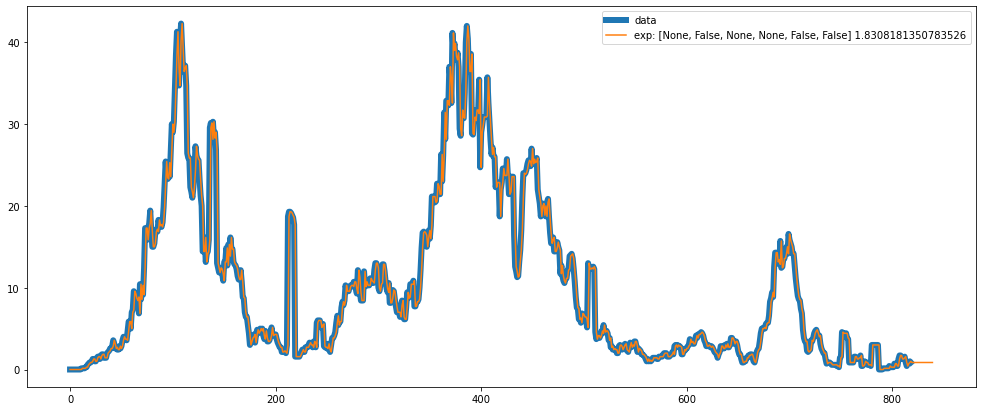

In [125]:
yhat = obj.instance_forecast_ahead(20)

import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

In [126]:
begin_forecast = "2020-04-01"
end_forecast = "2022-08-10"
yhat = obj.instance_forecast_by_period(str(obj.begin_raw.date()), end_forecast)

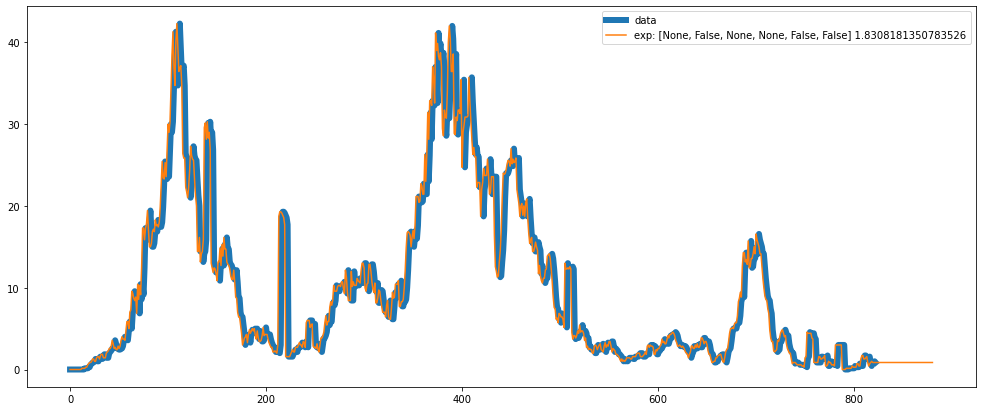

In [127]:
import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

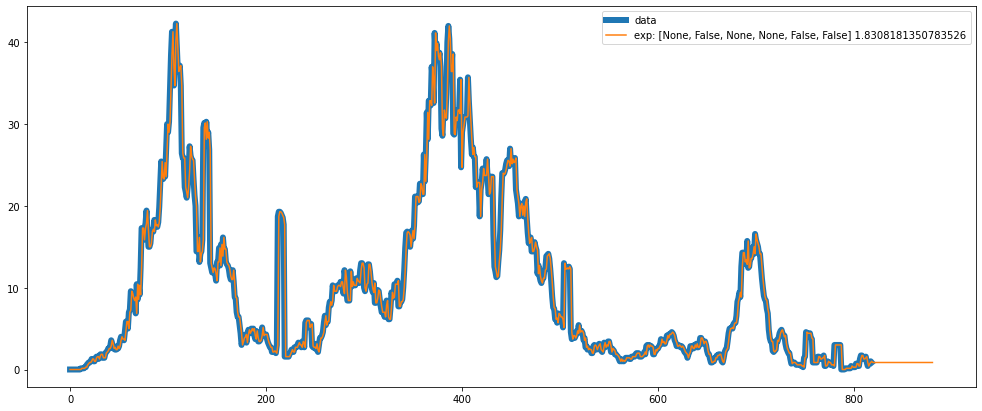

In [128]:
import matplotlib.pyplot as plt
from numpy import array
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

# convert windows of weekly multivariate data into a series of total power
def to_series(data):
  # extract just the total power from each week
  series = [week[:] for week in data]
  # flatten into a single series
  series = array(series).flatten()
  return series

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()